Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitise and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [1244]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")
import json
import ast

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [1245]:
#### load the movie dataset and create their dataframes

movies_df = pd.read_csv('movies.csv')
movies_df


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'] from the data set as they will not be used in the analysis.

In [1246]:
movies_df=movies_df.drop(['keywords', 'homepage', 'status', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], axis=1)
movies_df


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Remove any duplicate rows

In [1247]:
movies_df.drop_duplicates()

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,14.269792,"[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,0.642552,[],2011-12-26,0,85.0,[],Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,1.444476,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,0.857008,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Shanghai Calling,5.7,7


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [1248]:
movies_df = movies_df[(movies_df['budget'] > 0)& (movies_df['revenue'] > 0)]
movies_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [1249]:
# Change the release_date column to DateTime column
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])


# Extract the release year from every release date
movies_df['year'] = movies_df['release_date'].dt.year
movies_df

C:\Users\josh_\AppData\Local\Temp\ipykernel_13524\504187934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])
C:\Users\josh_\AppData\Local\Temp\ipykernel_13524\504187934.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['year'] = movies_df['release_date'].dt.year


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Clerks,7.4,755,1994
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Pink Flamingos,6.2,110,1972
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Cure,7.4,63,1997
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Primer,6.9,658,2004


#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [1250]:
movies_df['budget'] = movies_df['budget'].astype(np.int64)
movies_df['revenue'] = movies_df['revenue'].astype(np.int64)
print(movies_df.dtypes)



budget                           int64
genres                          object
id                               int64
popularity                     float64
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
title                           object
vote_average                   float64
vote_count                       int64
year                             int64
dtype: object


C:\Users\josh_\AppData\Local\Temp\ipykernel_13524\3767463768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['budget'] = movies_df['budget'].astype(np.int64)
C:\Users\josh_\AppData\Local\Temp\ipykernel_13524\3767463768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['revenue'] = movies_df['revenue'].astype(np.int64)


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [1251]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(movies_df.index,movies_df[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append(i[j][key])# the key 'name' contains the name of the genre
        movies_df.loc[index,column]=str(list1)
    
(parse_col_json('genres', 'name'))
parse_col_json('spoken_languages', 'name')
parse_col_json('production_countries', 'name')
movies_df


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994
4788,12000,"['Horror', 'Comedy', 'Crime']",692,4.553644,['United States of America'],1972-03-12,6000000,93.0,['English'],Pink Flamingos,6.2,110,1972
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],Cure,7.4,63,1997
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Primer,6.9,658,2004


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

Movies with the highest budgets:
1) Title: Pirates of the Caribbean: On Stranger Tides Budget: $380000000
2) Title: Pirates of the Caribbean: At World's End Budget: $300000000
3) Title: Avengers: Age of Ultron Budget: $280000000
4) Title: Superman Returns Budget: $270000000
5) Title: John Carter Budget: $260000000

Movies with the lowest budgets:
1) Title: The Prophecy Budget: $8
2) Title: Split Second Budget: $7
3) Title: Bran Nue Dae Budget: $7
4) Title: A Farewell to Arms Budget: $4
5) Title: Modern Times Budget: $1


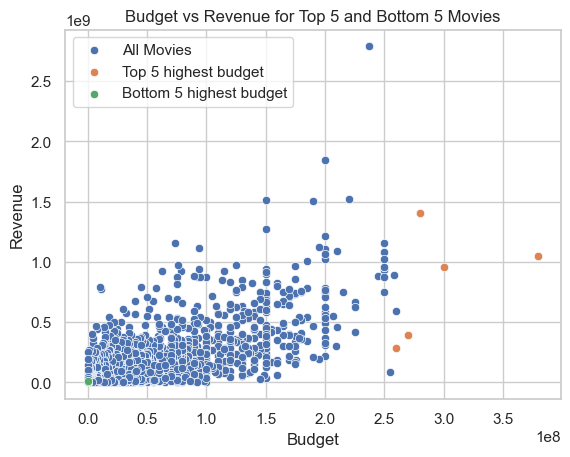

In [1252]:
sorted_df=movies_df.sort_values(by='budget', ascending=False)
sns.scatterplot(x=movies_df['budget'], y=movies_df['revenue'], label='All Movies')

budget_top_5 = sorted_df.head()
budget_top_5_title = budget_top_5['title']
budget_top_5_budget = budget_top_5['budget']
budget_top_5_revenue = budget_top_5['revenue']
sns.scatterplot(x=budget_top_5_budget, y=budget_top_5_revenue, label='Top 5 highest budget')

budget_bottom_5 = sorted_df.tail()
budget_bottom_5_title = budget_bottom_5['title']
budget_bottom_5_budget = budget_bottom_5['budget']
budget_bottom_5_revenue= budget_bottom_5['revenue']
sns.scatterplot(x=budget_bottom_5_budget, y=budget_bottom_5_revenue, label='Bottom 5 highest budget')

print('Movies with the highest budgets:')
i=1
for budget_top_5_title,budget_top_5_budget in zip(budget_top_5_title,budget_top_5_budget):
    print(f'{i}) Title: {budget_top_5_title} Budget: ${budget_top_5_budget}')
    i+=1


print('\nMovies with the lowest budgets:')
i=1
for budget_bottom_5_title,budget_bottom_5_budget in zip(budget_bottom_5_title,budget_bottom_5_budget):
    print(f'{i}) Title: {budget_bottom_5_title} Budget: ${budget_bottom_5_budget}')
    i+=1



# Label the x-axis as 'Budget' and the y-axis as 'Revenue'
plt.xlabel('Budget')
plt.ylabel('Revenue')

# Give the plot a title
plt.title('Budget vs Revenue for Top 5 and Bottom 5 Movies')

# Show the plot
plt.show()

Movies with a higher budget generally generate a higher budget and movies with little budget do not generate as much revenue.

#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [1253]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
sorted_df=movies_df.sort_values(by='profit', ascending=False)
movies_df

C:\Users\josh_\AppData\Local\Temp\ipykernel_13524\4029389476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['profit'] = movies_df['revenue'] - movies_df['budget']


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,2009,2550965087
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,2007,661000000
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Spectre,6.3,4466,2015,635674609
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],The Dark Knight Rises,7.6,9106,2012,834939099
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],John Carter,6.1,2124,2012,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Clerks,7.4,755,1994,3124130
4788,12000,"['Horror', 'Comedy', 'Crime']",692,4.553644,['United States of America'],1972-03-12,6000000,93.0,['English'],Pink Flamingos,6.2,110,1972,5988000
4792,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],Cure,7.4,63,1997,79000
4796,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Primer,6.9,658,2004,417760


C:\Users\josh_\AppData\Local\Temp\ipykernel_13524\2960638495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['profit'] = movies_df['revenue'] - movies_df['budget']


Movies with the highet profits:
1) Title: Avatar Profit: $2550965087 Budget:$237000000
2) Title: Titanic Profit: $1645034188 Budget:$200000000
3) Title: Jurassic World Profit: $1363528810 Budget:$150000000
4) Title: Furious 7 Profit: $1316249360 Budget:$190000000
5) Title: The Avengers Profit: $1299557910 Budget:$220000000

Movies with the lowest profits:
1) Title: The Adventures of Pluto Nash Profit: $-92896027 Budget:$100000000
2) Title: The 13th Warrior Profit: $-98301101 Budget:$160000000
3) Title: Mars Needs Moms Profit: $-111007242 Budget:$150000000
4) Title: The Alamo Profit: $-119180039 Budget:$145000000
5) Title: The Lone Ranger Profit: $-165710090 Budget:$255000000


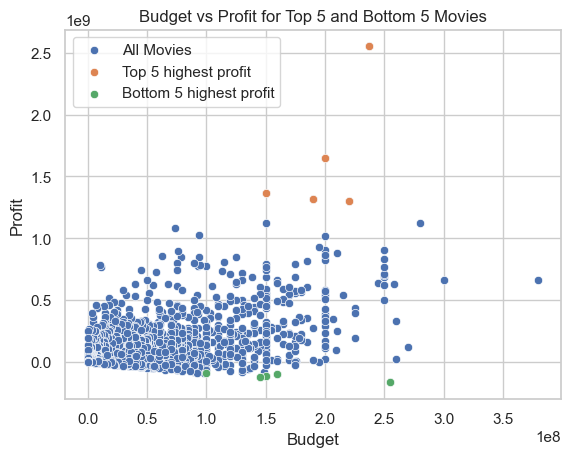

In [1254]:
movies_df['profit'] = movies_df['revenue'] - movies_df['budget']
sorted_df=movies_df.sort_values(by='profit', ascending=False)

sns.scatterplot(x='budget', y='profit', label='All Movies',data=movies_df)

profit_top_5 = sorted_df.head(5)
profit_top_5_titles = profit_top_5['title']
profit_top_5_profit = profit_top_5['profit']
profit_top_5_budget = profit_top_5['budget']

sns.scatterplot(x=profit_top_5_budget, y=profit_top_5_profit, label='Top 5 highest profit')

print('Movies with the highet profits:')
i=1
for profit_top_5_titles,profit_top_5_profit,profit_top_5_budget in zip(profit_top_5_titles,profit_top_5_profit,profit_top_5_budget):
    print(f'{i}) Title: {profit_top_5_titles} Profit: ${profit_top_5_profit} Budget:${profit_top_5_budget}')
    i+=1

profit_bottom_5 = sorted_df.tail(5)
profit_bottom_5_titles = profit_bottom_5['title']
profit_bottom_5_profit = profit_bottom_5['profit']
profit_bottom_5_budget = profit_bottom_5['budget']

sns.scatterplot(x=profit_bottom_5_budget, y=profit_bottom_5_profit, label='Bottom 5 highest profit')

print('\nMovies with the lowest profits:')
i=1
for profit_bottom_5_titles,profit_bottom_5_profit,profit_bottom_5_budget in zip(profit_bottom_5_titles,profit_bottom_5_profit,profit_bottom_5_budget):
    print(f'{i}) Title: {profit_bottom_5_titles} Profit: ${profit_bottom_5_profit} Budget:${profit_bottom_5_budget}')
    i+=1


plt.xlabel('Budget')
plt.ylabel('Profit')    
plt.title('Budget vs Profit for Top 5 and Bottom 5 Movies')

plt.show()

Genenerally, movies with a higher budget recieve a greater profit. There are outliers in the data with a high budget and a large loss such as 'The Lone Ranger'

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [1255]:
sorted_df=movies_df.sort_values(by='popularity', ascending=False)
sorted_df

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,year,profit
546,74000000,"['Family', 'Animation', 'Adventure', 'Comedy']",211672,875.581305,['United States of America'],2015-06-17,1156730962,91.0,['English'],Minions,6.4,4571,2015,1082730962
95,165000000,"['Adventure', 'Drama', 'Science Fiction']",157336,724.247784,"['Canada', 'United States of America', 'United...",2014-11-05,675120017,169.0,['English'],Interstellar,8.1,10867,2014,510120017
788,58000000,"['Action', 'Adventure', 'Comedy']",293660,514.569956,['United States of America'],2016-02-09,783112979,108.0,['English'],Deadpool,7.4,10995,2016,725112979
94,170000000,"['Action', 'Science Fiction', 'Adventure']",118340,481.098624,"['United Kingdom', 'United States of America']",2014-07-30,773328629,121.0,['English'],Guardians of the Galaxy,7.9,9742,2014,603328629
127,150000000,"['Action', 'Adventure', 'Science Fiction', 'Th...",76341,434.278564,"['Australia', 'United States of America']",2015-05-13,378858340,120.0,['English'],Mad Max: Fury Road,7.2,9427,2015,228858340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4065,2100000,"['Drama', 'Crime']",364083,0.039007,['United States of America'],2015-10-16,3330,126.0,"['Español', 'English']",Mi America,0.0,0,2015,-2096670
2970,10500000,"['Drama', 'Comedy']",88641,0.037073,['United States of America'],1994-09-02,123509,99.0,['English'],There Goes My Baby,8.5,2,1994,-10376491
3225,8000000,"['Adventure', 'Drama', 'Thriller']",62676,0.034259,[],1999-06-04,1997807,126.0,['English'],Limbo,7.0,17,1999,-6002193
4105,2000000,[],48382,0.031947,[],2003-09-12,1672730,120.0,[],"The Book of Mormon Movie, Volume 1: The Journey",5.0,2,2003,-327270


In [1256]:
popular_movies=sorted_df[sorted_df['popularity']>7]

titles_popular_movies=popular_movies['title']
rating_popular_movies=popular_movies['popularity']
print('Movies with popularity above 7:')
i=1
for titles_popular_movies,rating_popular_movies in zip(titles_popular_movies,rating_popular_movies):
    print(f'{i}) Title: {titles_popular_movies}, Rating:{rating_popular_movies}')
    i+=1

Movies with popularity above 7:
1) Title: Minions, Rating:875.581305
2) Title: Interstellar, Rating:724.247784
3) Title: Deadpool, Rating:514.569956
4) Title: Guardians of the Galaxy, Rating:481.098624
5) Title: Mad Max: Fury Road, Rating:434.278564
6) Title: Jurassic World, Rating:418.708552
7) Title: Pirates of the Caribbean: The Curse of the Black Pearl, Rating:271.972889
8) Title: Dawn of the Planet of the Apes, Rating:243.791743
9) Title: The Hunger Games: Mockingjay - Part 1, Rating:206.227151
10) Title: Big Hero 6, Rating:203.73459
11) Title: Terminator Genisys, Rating:202.042635
12) Title: Captain America: Civil War, Rating:198.372395
13) Title: Whiplash, Rating:192.528841
14) Title: The Dark Knight, Rating:187.322927
15) Title: The Martian, Rating:167.93287
16) Title: Inception, Rating:167.58371
17) Title: Frozen, Rating:165.125366
18) Title: Batman v Superman: Dawn of Justice, Rating:155.790452
19) Title: Avatar, Rating:150.437577
20) Title: Fight Club, Rating:146.757391
21) 

#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

2014 was the most profitable year

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

C:\Users\josh_\AppData\Local\Temp\ipykernel_13524\1561222198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)


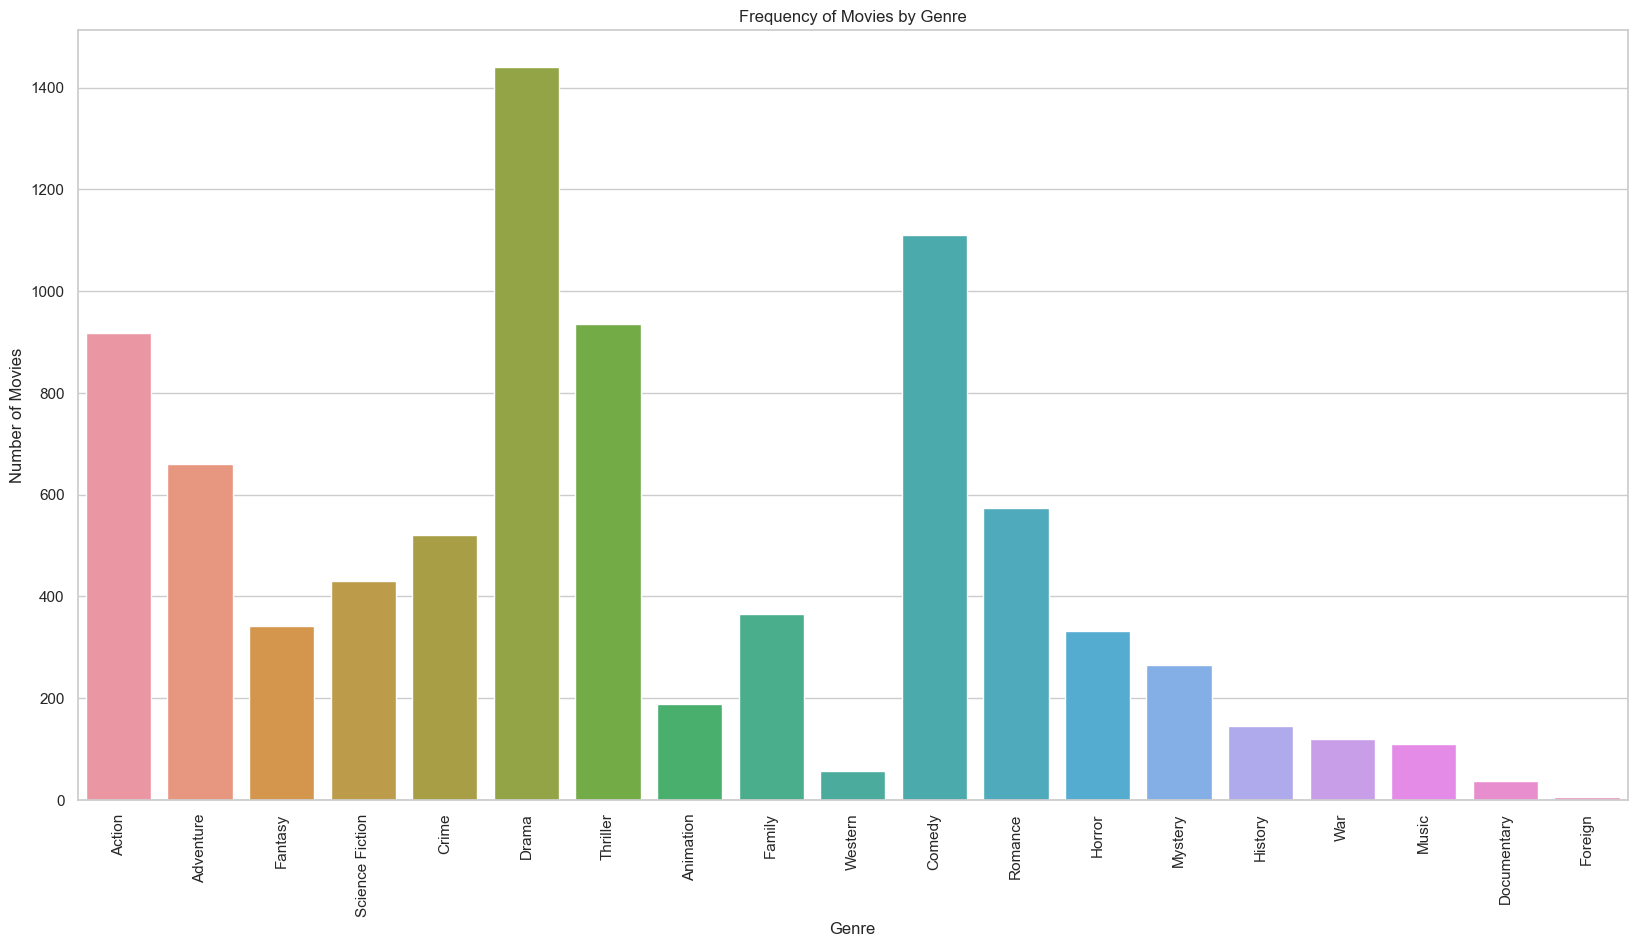

In [1257]:
fig = plt.figure(figsize=(20,10))
movies_df['genres'] = movies_df['genres'].apply(ast.literal_eval)
genres_df = movies_df.explode('genres')
sns.countplot(x='genres', data=genres_df)

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Frequency of Movies by Genre')
plt.xticks(rotation=90)

plt.show()

Text(0.5, 1.0, 'Popularity vs Profit')

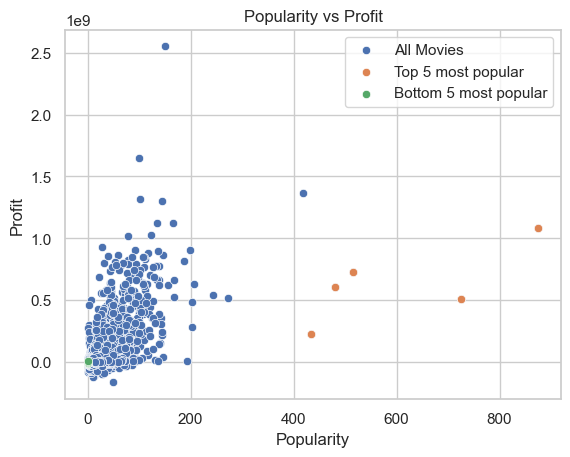

In [1258]:
sorted_df=movies_df.sort_values(by='popularity', ascending=False)
popularity_top_5 = sorted_df.head()
popularity_bottom_5 = sorted_df.tail()

sns.scatterplot(y='profit', x='popularity', data=movies_df,label='All Movies')
sns.scatterplot(y='profit', x='popularity', data=popularity_top_5,label='Top 5 most popular')
sns.scatterplot(y='profit', x='popularity', data=popularity_bottom_5,label='Bottom 5 most popular')
# Set the x-axis label and y-axis label
plt.ylabel('Profit')
plt.xlabel('Popularity')

# Set the title of the plot
plt.title('Popularity vs Profit')

The most popular movies are not always the most profitable

Text(0.5, 1.0, 'Runtime vs Profit')

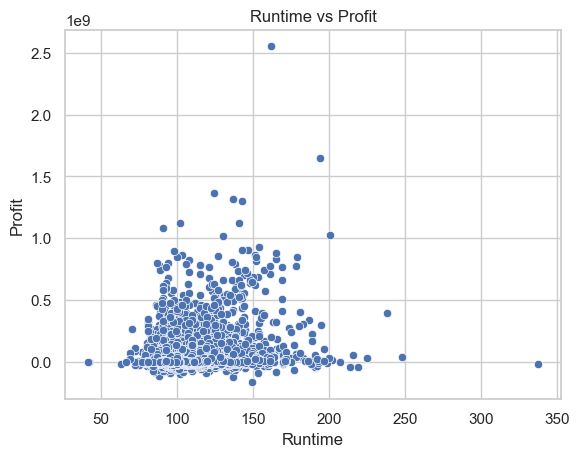

In [1259]:
# runtime x profit
# genres x profit
sns.scatterplot(y='profit', x='runtime', data=movies_df)
plt.ylabel('Profit')
plt.xlabel('Runtime')

plt.title('Runtime vs Profit')


Shorter films are generally less profitable.

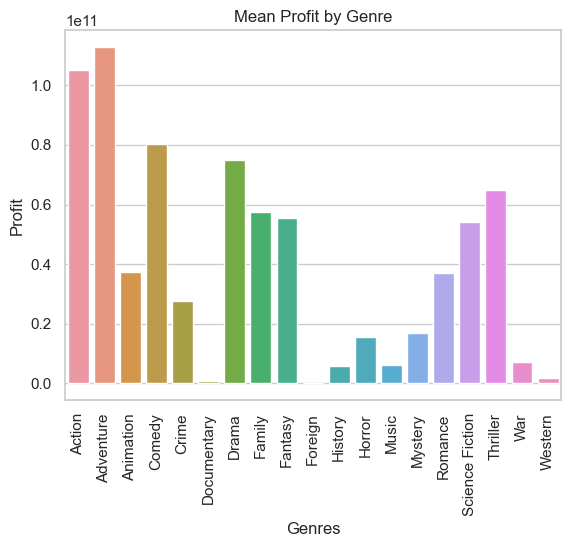

In [1260]:
genre_profit_df = movies_df[['genres','profit']]
genre_profit_df = movies_df.explode('genres')
genre_profit_df = genre_profit_df.groupby('genres').sum()
sns.barplot(x=genre_profit_df.index, y='profit', data=genre_profit_df)
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.title('Mean Profit by Genre')
plt.show()


Adventure and action movies generate the most profit.

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualisations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)